In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc
import joblib
from itertools import combinations
blues = ["#0d88e6", "#8ECDDD", "#22668D", ]

COLORS = ['#4F6272', '#B7C3F3',  '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [23]:
limit = 989.1666870117188 / 1000
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina_xor"
num_layers = '3'
dim1, dim2 = [3, 4]
dims = [6, 3, 4, 2]

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/retina_{num_layers}_layers_{dim1}_{dim2}"
res_folder = f"{results_path}/retina_{num_layers}_layers_{dim1}_{dim2}"
original_dist_path =  f'{res_folder}/first_analysis_results/2023-09-12-09-37-19_all_results_from_teach_archs_results_with_motifs_6000_ep.csv'
genetic_path_name = f'{res_folder}/requiered_features_genetic_models/6_features_nice/good_archs/first_analysis_results/2023-09-14-13-50-24_all_results_from_teach_archs_results_with_motifs_6000_ep_no_duplicates.csv'

In [24]:
first_analsis_orig = pd.read_csv(f"{original_dist_path}")
first_analsis_orig_top = first_analsis_orig[first_analsis_orig['mean_performance'] >=limit].drop_duplicates([
            'num_connections',
            'entropy',
            'normed_entropy',
            'connectivity_ratio',
            'num_neurons',
                'neurons_in_layer_0',
                'neurons_in_layer_1',
                'neurons_in_layer_2',
                'max_possible_connections',
                'motifs_count_0',
                'motifs_count_1',
                'motifs_count_2',])
first_analsis_genetic = pd.read_csv(f"{genetic_path_name}")

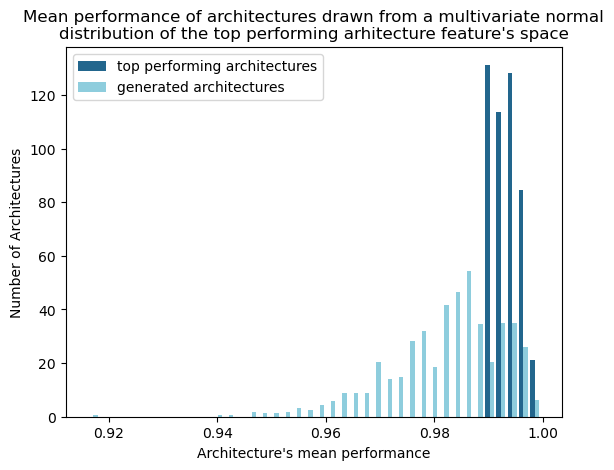

In [45]:
plt.hist([first_analsis_orig_top['mean_performance'], first_analsis_genetic['mean_performance']], density=True, bins =40, label=['top performing architectures', 'generated architectures' ], color=[blues[2],blues[1]])
plt.legend()
plt.xlabel("Architecture's mean performance")
plt.ylabel('Number of Architectures')
plt.title("Mean performance of architectures drawn from a multivariate normal\ndistribution of the top performing arhitecture feature's space")
plt.savefig(f"{local_base_path}/plots/for_poster/retina_{num_layers}_layers_{dim1}_{dim2}/gentic_vs_original.png"
)